<a href="https://colab.research.google.com/github/agpo-ilr-uni-bonn/PromotionskollegModule6800_2024/blob/master/6800_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 : Code used during lecture and lab assignment

### Instructions

- The notebook combines 'code used during lecture' with the 'Day 1 lab' assignment (see further down)
- The lab assignment can be done largely by copying/paste/modification of the code used during the lecture
- Please add answers/discussion/comments to the notebook as comments or text box. Do not create another file in addition.
- When you are done with your assignment, save the notebook in drive and add your last name to the name of the file.
- To hand in the final notebook follow the instructions provided by email

# Code used during lecture - Part A: Simple model to predict forest cover




In [1]:
# Import libaries that will be used in the notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import seaborn as sns
import os

In [2]:
# run this cell only once if you don't have wget installed
# its assumed you are using windows and have python installed
# only needed if you are running the notebook locally
# %pip install wget
#if not os.path.isfile('brazil_all_data_v2.gz'):
#    !python -m wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
# Download data only once and make sure it is in the same folder as the notebook

# check if brazil_all_data_v2.gz is available in the current folder and if not, download it

if not os.path.isfile('brazil_all_data_v2.gz'):
    !wget  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz



--2024-09-02 07:15:00--  https://ilr-ml.s3.eu-central-1.amazonaws.com/brazil_all_data_v2.gz
Resolving ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)... 3.5.136.11, 52.219.140.36, 52.219.169.254, ...
Connecting to ilr-ml.s3.eu-central-1.amazonaws.com (ilr-ml.s3.eu-central-1.amazonaws.com)|3.5.136.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283350352 (270M) [application/x-gzip]
Saving to: ‘brazil_all_data_v2.gz’

brazil_all_data_v2. 100%[===================>] 270.22M  32.2MB/s    in 9.1s    

2024-09-02 07:15:09 (29.6 MB/s) - ‘brazil_all_data_v2.gz’ saved [283350352/283350352]



In [3]:
# Load data with pandas into a dataframe
df = pd.read_parquet('brazil_all_data_v2.gz')

In [4]:
# Have a look at the data
print('Number of rows:', df.shape[0])
df.head(5)

Number of rows: 249940


,id,row,col,lon,lat,bean,carrot,cassava,chickpea,citrus,...,tot_defor_2010_lag_3rd_order,tot_defor_2011_lag_3rd_order,tot_defor_2012_lag_3rd_order,tot_defor_2013_lag_3rd_order,tot_defor_2014_lag_3rd_order,tot_defor_2015_lag_3rd_order,tot_defor_2016_lag_3rd_order,tot_defor_2017_lag_3rd_order,tot_defor_2018_lag_3rd_order,s
0,0,0,0,-59.989876,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,1.800000,1.333333,6.866667,0.733333,2.200000,4.466667,9.866667,6.600000,0.800000,1
1,1,0,1,-59.969875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,1.052631,2.000000,5.105263,0.526316,0.947368,1.473684,9.473684,6.210527,2.000000,1
2,2,0,2,-59.949875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,3.652174,1.652174,5.913043,4.086957,4.521739,4.956522,8.695652,11.217392,5.173913,1
3,3,0,3,-59.929874,-10.010125,200.00000,335.00000,201.0,0.0,391.0,...,3.814815,2.666667,5.407407,4.000000,3.925926,3.703704,5.888889,19.629629,6.518518,1
4,4,0,4,-59.909874,-10.010125,218.33334,435.83334,216.0,0.0,523.5,...,8.296296,2.629630,5.222222,7.592592,5.370370,4.481482,8.888889,18.888889,5.222222,1


In [5]:
# Define target (dependent) variable (% forest cover for 2018)
strY = 'perc_treecover'


# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'maize',
  'soy',
  'sugarcane',
  'perm_water',
  'travel_min',
  'cropland',
  'mean_elev',
  'sd_elev',
  'near_road',
 ]



Run OLS on forest cover

In [6]:
# Get target variable and features
Y_all = df[strY]
X_all = df.loc[:,lstX]

In [7]:
# Run OLS using sklearn
# We run an regression using sklearn which is one of the most popular
# libaries for machine learning

# Define model (automatically add a constant)
regOls = LinearRegression(fit_intercept=True)
# Alternative specification as a pipline with automatically scaling the data, however, not necessary for OLS
# regOls = make_pipeline(StandardScaler(with_mean=False), LinearRegression(fit_intercept=True))

# Fit model
regOls.fit(X_all, Y_all)

LinearRegression()

In [8]:
from scipy.stats import norm
# View regression results
# Note: Sklearn is not econometric package and does not provide our classical
# regression table output. This is not what the machine learning community
# looks at. However, we can calculate these things manually.

# Get coef
coefs = np.hstack((regOls.intercept_, regOls.coef_))

N = Y_all.shape[0]
K = coefs.shape[0]

# Get predicted values y hat
Y_hat = regOls.predict(X_all)
# Get errors
err = Y_all-Y_hat
# Get standard error of regression
sig2 = (err.transpose() @ err) / (N-K)
sig2

# Add constant to X_all (sklearn did this automatically)
Xc_all = np.insert(np.array(X_all), 0, 1, axis = 1)

# Covariance matrix for coef
VarBeta = sig2 * np.linalg.inv(Xc_all.T @ Xc_all)
# Standard error of coef
se = np.sqrt(np.diag(VarBeta))
# t-values
t =  coefs/se
# p-values
p = (1 - norm.cdf(abs(t))) * 2
# Prepare df as output
resOls = pd.DataFrame(coefs,index=['const']+lstX,columns=['beta'])
resOls['SE'] = se
resOls['t'] = t
resOls['p-value'] = p
resOls

,beta,SE,t,p-value
const,-5.831235,1.324112,-4.403882,0.000011
wdpa_2017,11.427969,0.156940,72.817276,0.000000
population_2015,-0.008522,0.000677,-12.595832,0.000000
chirps_2017,0.036649,0.000314,116.867636,0.000000
maize,0.019095,0.000159,120.445045,0.000000
soy,-0.030865,0.000407,-75.758273,0.000000
sugarcane,-0.003199,0.000141,-22.739455,0.000000
perm_water,-21.908606,1.184469,-18.496556,0.000000
travel_min,0.019945,0.000139,143.456389,0.000000
cropland,-1.174515,0.540421,-2.173335,0.029755


In [9]:
# To confirm the results we can use the OLS function in the statsmodel libary.
# This is more a statistical libary, not typically used for machine learning,
# but providing our typicall regression output

import statsmodels.api as sm

olsStats = sm.OLS(Y_all, np.insert(np.array(X_all), 0, 1, axis = 1))
# Set the names of the explanatory variables
olsStats.data.xnames = ['const']+lstX
olsStats_result = olsStats.fit()
print(olsStats_result.summary())

                            OLS Regression Results                            
Dep. Variable:         perc_treecover   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 1.688e+04
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:15:19   Log-Likelihood:            -1.1677e+06
No. Observations:              249940   AIC:                         2.335e+06
Df Residuals:                  249927   BIC:                         2.336e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.8312      1.324     


Mean squared error:  669.0920641940289
Coefficient of determination:  0.44772019128724727


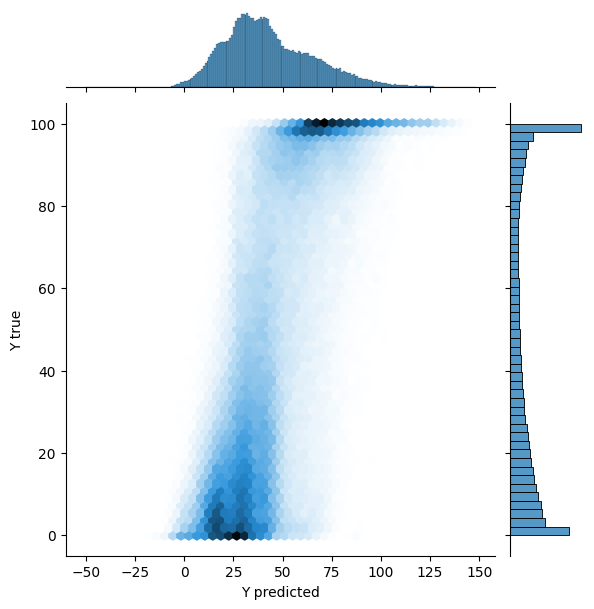

In [10]:
# Now we want to see how good our OLS regression performs in sample
# i.e. on the training data itself

# Make predictions for the same dataset X_all
Y_hat = regOls.predict(X_all)

# The mean squared error
mse_ols_sklearn  = mean_squared_error(Y_all,Y_hat)
print('\nMean squared error: ',mse_ols_sklearn)
# The coefficient of determination: 1 is perfect prediction
R2_ols_sklearn = r2_score(Y_all,Y_hat)
print('Coefficient of determination: ',R2_ols_sklearn)

# plot Y vs Y-hat
h = sns.jointplot(x=Y_hat, y=Y_all, kind="hex")
h.set_axis_labels('Y predicted', 'Y true');

Now we explore what consequences it has if a model overfits. For this we generate interaction and squared terms and compare model performance in a training and test set approach.

In [11]:
# Set a random number seed such that everybody has the same "random" split
# of the data
np.random.seed(111)
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [12]:
# In order to better illustrate the overfitting effects we
# artificially reduce the training data size.  Why do we do this? In general
# a larger sample size helps to reduce overfitting problems. With a smaller
# sample size polynomials of order 2 of our variables are sufficient to show
# the effects. With the full sample size we would need to consider much higher
# polynomials to show the same effects.
N = 2000
X_train = X_train.iloc[:N,:]
Y_train = Y_train.iloc[:N]


In [13]:
# Use an sklearn function to generate polynomials of order 2
# (square terms and interaction terms)
# (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.get_feature_names)
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('Total number of avaliable features',X_train_poly.shape[1])
lstFeatures = poly.get_feature_names_out()
# Show feature names
# list(lstFeatures)



Total number of avaliable features 91


In [14]:
# To explore overfitting we now run an small simulation...
# we squentially increase our model complexity by adding on additional features.
# In each case we estimate the model and obtain models stats
# for the train and test set.

# Prepare a dataframe to hold the results
res = pd.DataFrame()

# Each iteration add in one  additional variables
for numVar in range(0,X_train_poly.shape[1]):

  # Define the feature set for the iteration
  X_train_subSet = X_train_poly[:,:numVar+1]
  X_test_subSet = X_test_poly[:,:numVar+1]

  # Define the pipeline for scaling and model fitting
  # regOls = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
  regOls = LinearRegression()
  # Train the model using the training sets
  regOls.fit(X_train_subSet, Y_train)

  # Get predicted values
  Y_hat_train = regOls.predict(X_train_subSet)
  Y_hat_test = regOls.predict(X_test_subSet)

  # Store model stats
  res.loc[f"numVar_{numVar}",'Number of X Variables'] = X_train_subSet.shape[1]
  res.loc[f"numVar_{numVar}",'New Feature'] = lstFeatures[numVar]

  # The mean squared error
  res.loc[f"numVar_{numVar}",'MSE Train'] = mean_squared_error(Y_train,Y_hat_train)
  res.loc[f"numVar_{numVar}",'MSE Test'] = mean_squared_error(Y_test,Y_hat_test)
  # The coefficient of determination: 1 is perfect prediction
  res.loc[f"numVar_{numVar}",'R2 train'] = r2_score(Y_train,Y_hat_train)
  res.loc[f"numVar_{numVar}",'R2 test'] = r2_score(Y_test,Y_hat_test)


# => The column "New Feature" says which feature was added in this iteration
#    on top of all the other added before, starting with only a constant
# => Have a look how R2 and MSE develops in the train and test set when
#    increasing model complexity.
res


,Number of X Variables,New Feature,MSE Train,MSE Test,R2 train,R2 test
numVar_0,1.0,1,1216.525636,1213.005815,0.000000,-0.000181
numVar_1,2.0,wdpa_2017,1092.857849,1102.641178,0.101657,0.090820
numVar_2,3.0,population_2015,1091.452623,1101.598429,0.102812,0.091680
numVar_3,4.0,chirps_2017,956.060772,981.976805,0.214106,0.190314
numVar_4,5.0,maize,913.715950,929.376214,0.248914,0.233685
...,...,...,...,...,...,...
numVar_86,87.0,mean_elev sd_elev,530.718203,42927.052241,0.563743,-34.395385
numVar_87,88.0,mean_elev near_road,523.025791,43000.110680,0.570066,-34.455625
numVar_88,89.0,sd_elev^2,518.977085,37915.027097,0.573394,-30.262733
numVar_89,90.0,sd_elev near_road,517.769904,37210.556125,0.574386,-29.681864


In [15]:
# Before we continue lets check if our simulation is correct, by comparing
# row "numVar_12" from "res" with our statsmodel and sklearn that we
# have use above
print('Results from statsmodel:')
print('R2',olsStats_result.rsquared)
print('MSE',olsStats_result.mse_resid)

print('\nResults from sklearn:')
print('R2 ',R2_ols_sklearn)
print('MSE ',mse_ols_sklearn)

# Check that the results match our "res" data frame in row "numVar_12", which is
# a linear model with all explanatory variables
print('\nResults from row "numVar_12" from the "res" dataframe')
print(res.loc['numVar_12',:])

# => Note that in the simulation our X_train is a much smaller subsample
#   of the full data set. Hence, we have some small variation but overall
#   the result is very comparable

Results from statsmodel:
R2 0.44772019128724727
MSE 669.1268671438283

Results from sklearn:
R2  0.44772019128724727
MSE  669.0920641940289

Results from row "numVar_12" from the "res" dataframe
Number of X Variables          13.0
New Feature               near_road
MSE Train                655.299137
MSE Test                 672.795379
R2 train                   0.461336
R2 test                    0.445248
Name: numVar_12, dtype: object


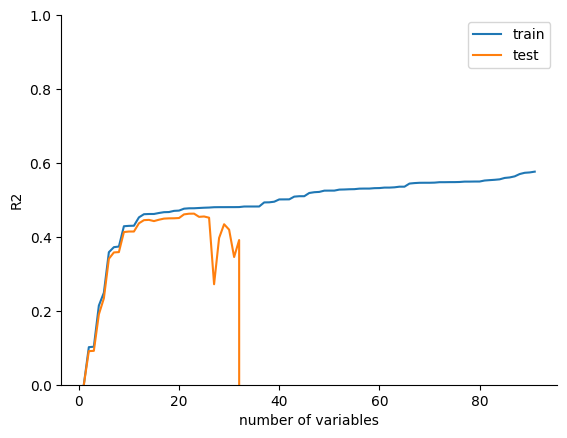

In [16]:
# Now back to our simulation results. To inspect the overfitting of the model
# lets plot R2 and MSE against the number of variables in the model.

# Start with R2
fig, ax = plt.subplots()
ax.plot(res['Number of X Variables'],res['R2 train'],label='train')
ax.plot(res['Number of X Variables'],res['R2 test'],label='test')
ax.set_ylabel('R2')
ax.set_xlabel('number of variables')
ax.set_ylim(0,1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend();

# => Note that in same cases our R2 in the test set is negative, which means
#    that our model is completely off...

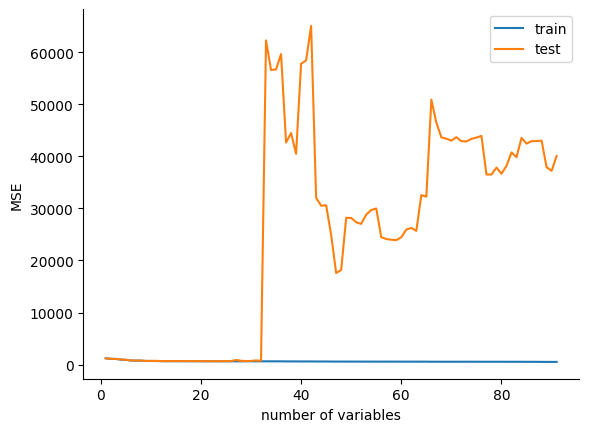

In [17]:
# ... and MSE
fig, ax = plt.subplots()
ax.plot(res['Number of X Variables'],res['MSE Train'],label='train')
ax.plot(res['Number of X Variables'],res['MSE Test'],label='test')
ax.set_ylabel('MSE')
ax.set_xlabel('number of variables')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend();

In [18]:
# =====================================
# Question to discuss in the group:
# =====================================

# What can you conclude from the plots?

In [19]:
# Now, we can find the "best" specification from our simulation
# by checking where R2 is highest in test set
iRes = res.loc[res['R2 test']==res['R2 test'].max(),:]
iRes




,Number of X Variables,New Feature,MSE Train,MSE Test,R2 train,R2 test
numVar_22,23.0,wdpa_2017 mean_elev,635.70165,651.420453,0.477445,0.462873


In [20]:
lstFeatures[:iRes['Number of X Variables'].iloc[0].astype(int)]

array(['1', 'wdpa_2017', 'population_2015', 'chirps_2017', 'maize', 'soy',
       'sugarcane', 'perm_water', 'travel_min', 'cropland', 'mean_elev',
       'sd_elev', 'near_road', 'wdpa_2017^2', 'wdpa_2017 population_2015',
       'wdpa_2017 chirps_2017', 'wdpa_2017 maize', 'wdpa_2017 soy',
       'wdpa_2017 sugarcane', 'wdpa_2017 perm_water',
       'wdpa_2017 travel_min', 'wdpa_2017 cropland',
       'wdpa_2017 mean_elev'], dtype=object)

In [21]:
# =====================================
# Question to discuss in the group:
# =====================================

# Why might this model specification strategy not be ideal?

### Let's see how Lasso could be used here

In [22]:
# The idea is that instead of adding in one variable at a time, we use all
# and let Lasso decide which ones to use.

# It turns out that in order to get better results we need to make
# the problem one step simpler for Lasso. If we use all polynomial terms
# Lasso has convergence issues, at least with the restricted sample size
# that we used above. Apparently the problem is that our variables are too
# correlated. However, we can also illustrate the apporoach by using only linear
# and square terms (excluding the interaction terms).

In [23]:
# Get only the linear and square terms from the polynomials

# idxSq = list(range(0,13))+[lstFeatures.index(c) for c in lstFeatures if '^2' in c]
idxSq = list(range(13)) + [i for i, name in enumerate(lstFeatures) if '^2' in name]
lstColNames = [lstFeatures[i] for i in idxSq]
X_trainSq = X_train_poly[:,idxSq]
X_testSq = X_test_poly[:,idxSq]



In [24]:
# Get actual names for features instead of x1,...,x11
# this is required for a plot further down...
sCols = pd.Series(lstColNames)
sCols = sCols.replace({'\^2':'_sq'},regex=True)
sCols = sCols.replace({'1':'const'},regex=False)
dctReplace = {f"x{i}":lstX[i] for i in range(10,len(lstX))}
sCols = sCols.replace(dctReplace,regex=True)
dctReplace = {f"x{i}":lstX[i] for i in range(0,10)}
sCols = sCols.replace(dctReplace,regex=True)
lstColNames = sCols


In [25]:
# Create a list with lambda values that we want to test for our Lasso estimation
# Note: np.logspace returns numbers spaced evenly on a log scale. The sequence
#       starts at base ** start (base to the power of start) and ends with
#       base ** stop (see endpoint below). https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
lstLambda = np.logspace(start=-16, stop=-3, num = 10, base = 2)
lstLambda

array([1.52587891e-05, 4.15280151e-05, 1.13021815e-04, 3.07597913e-04,
       8.37152327e-04, 2.27837703e-03, 6.20078536e-03, 1.68759334e-02,
       4.59292029e-02, 1.25000000e-01])

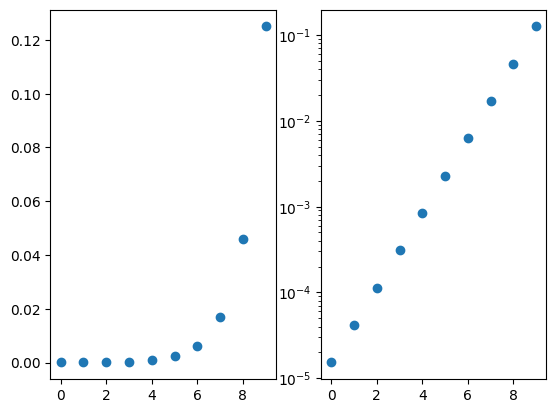

In [26]:
# Illustrate logspace
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(lstLambda,"o")
ax2.plot(lstLambda,"o")
ax2.set_yscale('log')

In [27]:
# Now loop over the lambdas, run a Lasso estimation and get the model stats
# Note the lambdas here are just the same as the penalty (lambda)

# Create a dataframe to hold model stats
resLasso = pd.DataFrame()
# Create a dataframe to hold coef
resCoef = pd.DataFrame(columns=lstColNames)

# Loop over a range of lambda value
for Lambda in lstLambda:
  print(Lambda)
  # Estimate Lasso
  if Lambda >0:
    # Define a pipeline that first standardized the data, then runs Lasso
    modLasso = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    # Note that what is called lambda in the lecture is called alpha in sklearn
    ('lasso', Lasso(fit_intercept=True, alpha=Lambda))])
    print("lasso is runing with Lambda={}".format(Lambda))

  else:
    # in case of Lambda = 0 use LinearRegression as recommended by sklearn
    modLasso = LinearRegression(fit_intercept=True)

  modLasso.fit(X_trainSq, Y_train)

  # Get predicted values
  Y_hat_train = modLasso.predict(X_trainSq)
  Y_hat_test = modLasso.predict(X_testSq)

  # Get model stats
  resLasso.loc[f"lasso_{Lambda}",'MSE Train'] = mean_squared_error(Y_train,Y_hat_train)
  resLasso.loc[f"lasso_{Lambda}",'MSE Test'] = mean_squared_error(Y_test,Y_hat_test)
  # The coefficient of determination: 1 is perfect prediction
  resLasso.loc[f"lasso_{Lambda}",'R2 train'] = r2_score(Y_train,Y_hat_train)
  resLasso.loc[f"lasso_{Lambda}",'R2 test'] = r2_score(Y_test,Y_hat_test)

  resLasso.loc[f"lasso_{Lambda}",'Lambda'] = Lambda

  resCoef.loc[f'beta_hat_Lambda{Lambda}','Lambda',] = Lambda
  resCoef.loc[f'beta_hat_Lambda{Lambda}',lstColNames] = modLasso.named_steps['lasso'].coef_.transpose()


# => As you will see in the output, there are some values of Lambda for which
#   Lasso does not converge. This is not ideal but for our results we can
#   ignore this for now.
# => Again check how MSE and R2 developed for varying values of Lambda

resLasso

1.52587890625e-05
lasso is runing with Lambda=1.52587890625e-05
4.152801514204032e-05
lasso is runing with Lambda=4.152801514204032e-05


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.756e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.463e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.770e+05, tolerance: 2.433e

0.00011302181546475716
lasso is runing with Lambda=0.00011302181546475716
0.00030759791257199025
lasso is runing with Lambda=0.00030759791257199025
0.0008371523270049544
lasso is runing with Lambda=0.0008371523270049544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.431e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+05, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


0.0022783770304221013
lasso is runing with Lambda=0.0022783770304221013
0.006200785359250777

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.187e+04, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(



lasso is runing with Lambda=0.006200785359250777


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+04, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


0.01687593342019228
lasso is runing with Lambda=0.01687593342019228
0.045929202883612456
lasso is runing with Lambda=0.045929202883612456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+03, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.168e+02, tolerance: 2.433e+02
  model = cd_fast.enet_coordinate_descent(


0.125
lasso is runing with Lambda=0.125


,MSE Train,MSE Test,R2 train,R2 test,Lambda
lasso_1.52587890625e-05,593.655664,627.785045,0.512007,0.482362,0.000015
lasso_4.152801514204032e-05,593.655673,627.781163,0.512007,0.482365,0.000042
lasso_0.00011302181546475716,593.655720,627.770625,0.512007,0.482373,0.000113
lasso_0.00030759791257199025,593.656013,627.742141,0.512007,0.482397,0.000308
lasso_0.0008371523270049544,593.658038,627.666091,0.512005,0.482460,0.000837
lasso_0.0022783770304221013,593.672640,627.469994,0.511993,0.482621,0.002278
lasso_0.006200785359250777,593.779718,627.016906,0.511905,0.482995,0.006201
lasso_0.01687593342019228,594.569898,626.380841,0.511256,0.483519,0.016876
lasso_0.045929202883612456,597.385183,625.602255,0.508942,0.484161,0.045929
lasso_0.125,612.069319,634.717203,0.496871,0.476646,0.125000


In [28]:
resCoef

,const,wdpa_2017,population_2015,chirps_2017,maize,soy,sugarcane,perm_water,travel_min,cropland,...,maize_sq,soy_sq,sugarcane_sq,perm_water_sq,travel_min_sq,cropland_sq,mean_elev_sq,sd_elev_sq,near_road_sq,Lambda
beta_hat_Lambda1.52587890625e-05,0.0,12.172622,-3.490122,-43.319095,21.270404,-19.015251,13.7839,4.051564,15.469775,1.778026,...,-6.853166,5.538042,-13.65919,-5.694835,-8.269063,-1.618349,-13.95906,-5.723816,-13.027105,0.000015
beta_hat_Lambda4.152801514204032e-05,0.0,12.163646,-3.489472,-43.309389,21.267043,-19.007479,13.77832,4.048603,15.469425,1.777893,...,-6.84955,5.531096,-13.654007,-5.691749,-8.268596,-1.618175,-13.956636,-5.723825,-13.026351,0.000042
beta_hat_Lambda0.00011302181546475716,0.0,12.139217,-3.487702,-43.282972,21.257896,-18.986325,13.763134,4.040543,15.468471,1.777531,...,-6.83971,5.512189,-13.639902,-5.683351,-8.267324,-1.617701,-13.950041,-5.723851,-13.024299,0.000113
beta_hat_Lambda0.00030759791257199025,0.0,12.072733,-3.482885,-43.211078,21.233001,-18.928754,13.721805,4.018608,15.465874,1.776546,...,-6.81293,5.460734,-13.601512,-5.660493,-8.263863,-1.616412,-13.932093,-5.723921,-13.018716,0.000308
beta_hat_Lambda0.0008371523270049544,0.0,11.891789,-3.469773,-43.015413,21.165249,-18.772069,13.609324,3.95891,15.458807,1.773866,...,-6.740045,5.320695,-13.497031,-5.598285,-8.254442,-1.612903,-13.883244,-5.724111,-13.003519,0.000837
beta_hat_Lambda0.0022783770304221013,0.0,11.399342,-3.43409,-42.482861,20.980862,-18.345646,13.303204,3.796437,15.439575,1.766571,...,-6.541685,4.939574,-13.212686,-5.428979,-8.228802,-1.603354,-13.750296,-5.72463,-12.962164,0.002278
beta_hat_Lambda0.006200785359250777,0.0,10.059119,-3.336975,-41.033428,20.479045,-17.185116,12.470087,3.354251,15.387232,1.746719,...,-6.001836,3.902334,-12.43883,-4.968197,-8.159021,-1.577365,-13.388466,-5.726039,-12.849615,0.006201
beta_hat_Lambda0.01687593342019228,0.0,6.411585,-3.072668,-37.088464,19.113364,-14.026722,10.202748,2.150807,15.244777,1.692693,...,-4.532622,1.079468,-10.332782,-3.714142,-7.969107,-1.506637,-12.403706,-5.729871,-12.543321,0.016876
beta_hat_Lambda0.045929202883612456,0.0,4.854369,-2.365452,-26.860929,17.373855,-11.321859,7.929099,0.0,14.924512,1.554003,...,-2.57046,-0.955806,-8.390124,-1.48132,-7.483928,-1.328515,-9.818752,-5.559649,-11.718294,0.045929
beta_hat_Lambda0.125,0.0,5.047124,-0.745085,-0.0,16.394599,-3.534653,0.0,-0.0,14.281127,1.181557,...,0.0,-7.70088,-1.876092,-1.241894,-6.340734,-0.86748,-4.817084,-4.900899,-9.604003,0.125000


In [29]:
# Get the "best" lambda by checking where MSE is lowest in test set
# (or R2 is highest)
iRes = resLasso.loc[resLasso['R2 test']==resLasso['R2 test'].max(),:]
LambdaBest = resLasso.loc[resLasso['R2 test']==resLasso['R2 test'].max(),'Lambda'].values[0]
print('The "best" Lambda (from those we tried in the simulations) is: ', LambdaBest)

The "best" Lambda (from those we tried in the simulations) is:  0.045929202883612456


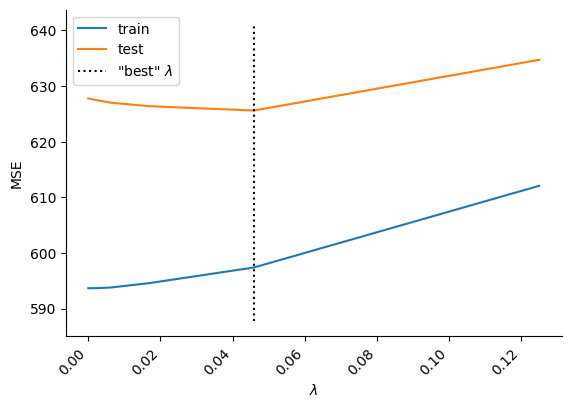

In [55]:
# Plot result

# Define range of Y that should be shown in plot
rangeYLow = resLasso['MSE Train'].min()*0.99
rangeYHigh = resLasso['MSE Test'].max()*1.01

fig, ax = plt.subplots()
ax.plot(resLasso['Lambda'],resLasso['MSE Train'],label='train')
ax.plot(resLasso['Lambda'],resLasso['MSE Test'],label='test')
ax.plot([LambdaBest,LambdaBest],[rangeYLow,rangeYHigh],label='"best" $\lambda$',linestyle=':',color='black')
ax.set_ylabel('MSE')
ax.set_xlabel('$\lambda$')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
fig.autofmt_xdate(rotation=45)
# ax.set_ylim(rangeYLow,rangeYHigh)
ax.legend();

In [54]:
# Repeat the simulation with a slightly larger lambda range
# in order to prepare a plot with the estimated coefficients against lambda
# Df to hold coef
resCoef = pd.DataFrame(columns=lstColNames)

# Loop over a range of lambda value
for Lambda in np.logspace(-16, 6, num = 10, base = 2):
  # Estimate Lasso
  if Lambda >0:
     modLasso = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('lasso', Lasso(fit_intercept=True, alpha=Lambda, max_iter=3000))])
  else:
    # in case of Lambda = 0 use LinearRegression as recommended by sklearn
    modLasso = LinearRegression(fit_intercept=True)
  modLasso.fit(X_trainSq, Y_train)

  resCoef.loc[f'beta_hat_Lambda{Lambda}','Lambda',] = Lambda
  resCoef.loc[f'beta_hat_Lambda{Lambda}',lstColNames] = modLasso.named_steps['lasso'].coef_.transpose()


import plotly.graph_objects as go
# Create traces
fig = go.Figure()

for strBeta in resCoef.columns[1:-1]:
  # ax.plot(resCoef['Lambda'],resPlot[strBeta],label=strBeta)
  fig.add_trace(go.Scatter(x=resCoef['Lambda'], y=resCoef[strBeta],
                      mode='lines',
                      name=strBeta))

rangeYLow = resCoef.min().min()*0.99
rangeYHigh = resCoef.max().max()*1.01
fig.add_trace(go.Scatter(x=[LambdaBest,LambdaBest], y=[rangeYLow,rangeYHigh],
                    mode='lines',
                    name='bestLambda',line=dict(color='black', dash='dash')))

fig.update_layout(
    width=800,
    height=400,
    xaxis_type="log",
    xaxis_title='$\lambda$',
    xaxis = dict(
      #  autorange='reversed',
      #  range=[2^-20,2^3],
    ),
    yaxis = dict(
       range=[rangeYLow,rangeYHigh],
    )
)
fig.show()

In [48]:
resCoef

,const,wdpa_2017,population_2015,chirps_2017,maize,soy,sugarcane,perm_water,travel_min,cropland,...,maize_sq,soy_sq,sugarcane_sq,perm_water_sq,travel_min_sq,cropland_sq,mean_elev_sq,sd_elev_sq,near_road_sq,Lambda
beta_hat_Lambda1.52587890625e-05,0.0,12.131817,-3.490857,-43.477555,21.249615,-18.979214,13.752131,4.057545,15.469595,1.776092,...,-6.847039,5.50846,-13.625183,-5.701387,-8.269491,-1.616968,-13.968459,-5.726763,-13.016207,0.000015
beta_hat_Lambda8.305603028408063e-05,0.0,12.108769,-3.489177,-43.452146,21.240989,-18.959236,13.737801,4.049887,15.468691,1.775753,...,-6.837723,5.490598,-13.611883,-5.693406,-8.268284,-1.616522,-13.962183,-5.726781,-13.014286,0.000083
beta_hat_Lambda0.00045208726185902865,0.0,11.983102,-3.480031,-43.313861,21.19403,-18.850489,13.659807,4.008217,15.463768,1.773909,...,-6.787007,5.393372,-13.539491,-5.649979,-8.261713,-1.614094,-13.928029,-5.726878,-13.00383,0.000452
beta_hat_Lambda0.002460783300575925,0.0,11.298142,-3.430254,-42.561561,20.938364,-18.25847,13.235216,3.781458,15.436957,1.763866,...,-6.510932,4.864083,-13.145391,-5.413652,-8.225937,-1.600874,-13.742165,-5.727415,-12.946891,0.002461
beta_hat_Lambda0.013394437232079271,0.0,7.566797,-3.159347,-38.4748,19.545603,-15.0341,10.922475,2.54752,15.291,1.7091,...,-5.007843,1.981504,-10.998496,-4.12765,-8.031209,-1.528845,-12.730972,-5.730497,-12.636406,0.013394
beta_hat_Lambda0.07290806497350734,0.0,4.915348,-1.695319,-16.936084,15.132484,-6.780133,4.556734,-0.0,14.638088,1.41797,...,-0.052491,-4.829028,-5.358981,-1.39316,-7.022656,-1.155702,-7.423308,-5.433619,-10.911352,0.072908
beta_hat_Lambda0.3968502629920502,0.0,4.9195,-0.469861,0.0,11.183751,-0.797427,-0.0,-0.0,12.405255,0.0,...,1.646768,-7.532195,-1.467384,-0.916651,-3.408606,-0.0,-5.094851,-1.916499,-2.824508,0.396850
beta_hat_Lambda2.160119477784617,0.0,3.836591,-0.0,0.0,0.0,-0.0,-0.0,-0.0,9.878392,-0.0,...,1.120309,-0.0,-0.0,-0.0,0.0,-0.0,-5.092866,0.0,0.0,2.160119
beta_hat_Lambda11.757875938204803,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,5.747061,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,11.757876
beta_hat_Lambda64.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,64.000000


In [49]:
resCoef.columns


Index(['const', 'wdpa_2017', 'population_2015', 'chirps_2017', 'maize', 'soy',
       'sugarcane', 'perm_water', 'travel_min', 'cropland', 'mean_elev',
       'sd_elev', 'near_road', 'wdpa_2017_sq', 'population_2015_sq',
       'chirps_2017_sq', 'maize_sq', 'soy_sq', 'sugarcane_sq', 'perm_water_sq',
       'travel_min_sq', 'cropland_sq', 'mean_elev_sq', 'sd_elev_sq',
       'near_road_sq', 'Lambda'],
      dtype='object')

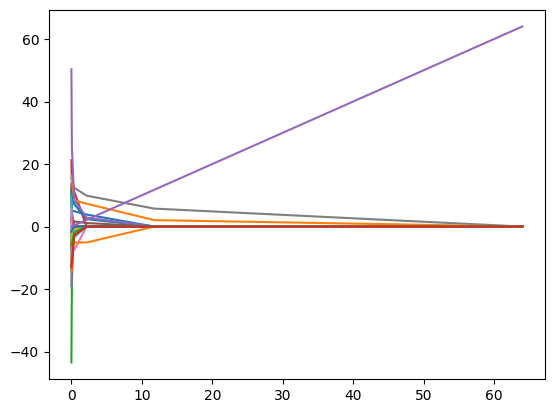

In [47]:
fig, ax= plt.subplots()
for strBeta in resCoef.columns[1:]:
  ax.plot(resCoef['Lambda'],resCoef[strBeta],label=strBeta)
  # fig.add_trace(go.Scatter(x=resCoef['Lambda'], y=resCoef[strBeta],
  #                     mode='lines',
  #                     name=strBeta))


# Code used during lecture - Part B: Lasso oracle property



In [33]:
import numpy as np
import pandas as pd
import scipy as sc
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [34]:
# Set the numpy random seed
np.random.seed(100)

First generate simulated data for known DGP

In [35]:
# code for creating simulated data
N = 10000
K = 3
sig = 0.3
mean = np.zeros([K])
cov = np.array([[30,0,0],[0,5,0],[0,0,15]])

In [36]:
# create characteristics/explantory variables
X = np.random.multivariate_normal(mean, cov,N)

In [37]:
# Check that cov is correct
np.cov(X,rowvar=False)

array([[30.23050526, -0.3000103 , -0.50301383],
       [-0.3000103 ,  4.9879058 ,  0.05362571],
       [-0.50301383,  0.05362571, 14.87753172]])

In [38]:
# Add a constant to X
Xc = np.concatenate([np.ones([N,1]),X],axis=1)
# Get beta values
beta = pd.DataFrame(np.random.randint(0, 20, (Xc.shape[1],1)),index=['const']+[f"beta{i}" for i in range(1,Xc.shape[1])],columns=['beta_true'])
beta


,beta_true
const,0
beta1,17
beta2,19
beta3,5


In [39]:
# create random white noise error
errStd = 50
err = np.random.normal(0, errStd, (N,1))

# Create dependent variable y=Xb+e
Y = np.matmul(Xc,beta.values)+err
Y

array([[-77.76356476],
       [-21.22039404],
       [-30.75129357],
       ...,
       [150.36505596],
       [ 98.59991957],
       [ 50.97405113]])

Run LASSO on simulated data

Compare to the true data generating process


In [40]:
# Estimate the model with Lasso
# Check how lambda affects the estimation
res = beta.transpose().copy()
lstBetaCols = list(res.columns)

lstLambda = np.logspace(-8, 15, num = 10, base = 2)
# Loop over a range of Lambda value
for Lambda in lstLambda:
  # Estimate Lasso
  modLasso = Lasso(fit_intercept=True, alpha=Lambda)
  modLasso.fit(X, Y[:,0])

  # Add estimated coef to result dataframe
  # Note, I rounded Lambda in the variable name just to make it more readable
  res.loc[f'beta_hat_Lambda_{round(Lambda,3)}','Lambda'] = Lambda
  res.loc[f'beta_hat_Lambda_{round(Lambda,3)}','const'] = modLasso.intercept_
  res.loc[f'beta_hat_Lambda_{round(Lambda,3)}',lstBetaCols[1:]] = modLasso.coef_.transpose()

res

,const,beta1,beta2,beta3,Lambda
beta_true,0.000000,17.000000,19.000000,5.000000,NaN
beta_hat_Lambda_0.004,-0.219724,17.132259,18.591273,4.870555,0.003906
beta_hat_Lambda_0.023,-0.219708,17.131569,18.587424,4.869265,0.022965
beta_hat_Lambda_0.135,-0.219616,17.127511,18.564797,4.861677,0.135007
beta_hat_Lambda_0.794,-0.219076,17.103658,18.431770,4.817071,0.793701
beta_hat_Lambda_4.666,-0.215900,16.963424,17.649716,4.554837,4.666116
beta_hat_Lambda_27.432,-0.197230,16.138999,13.052069,3.013176,27.431807
beta_hat_Lambda_161.27,-0.239070,11.531635,0.000000,0.000000,161.269894
beta_hat_Lambda_948.096,-0.516414,0.000000,0.000000,0.000000,948.095705
beta_hat_Lambda_5573.796,-0.516414,0.000000,0.000000,0.000000,5573.795841


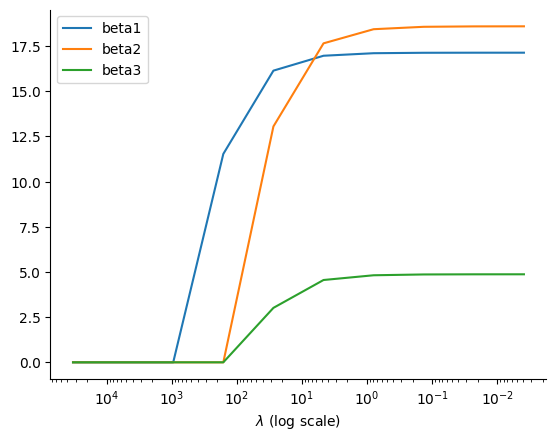

In [42]:
# Plot the estimated coeficients across different levels of lambda

import matplotlib.pyplot as plt
fig, ax = plt.subplots();
for strBeta in ['beta1','beta2','beta3']:
  ax.plot(res['Lambda'],res[strBeta],label=strBeta)

# ax.plot([10e5,0.031250],[0,0],color='black')
ax.set_xscale('log')
ax.set_xlabel('$\lambda$ (log scale)')
ax.invert_xaxis()
# ax.set_xlim(1,0.000031250)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend();

Now add a additional variable that is correlated to one of the existing variables but does not have an effect on the dependent variable

In [43]:
# Lasso Simulation example
# 1) Create a variable (X4) that is linearly dependent with X3
#    The strength of the relationship is governed by the parameter "paramX4"
#    A white noise error term is added. X4 = paramX4 * X3 + err
# 2) The error term is varied in a loop
# 3) In each step X4 is created and the Lasso is estimated. Lambda in the
#    Lasso estimation is automatically determined using LassoCV (best lambda
#    selected by cross-validation).
# 4) Results are saved given:
#     - The correlation coef between X4 and X3
#     - The estimated coef from Lasso
#   => This allows to see the highest coerrelation coef for which Lasso can
#     recover the true model


from sklearn.linear_model import LassoCV

res = pd.DataFrame(columns=['corrcoef','beta1','beta2','beta3','beta4'])
res.loc['true_model',['beta1','beta2','beta3']] = beta.iloc[1:].values.squeeze()
for errStdX4 in [0,1,2,3,4,5,7.5,10,15,20,25,30,45,50,55,100,200]:
  paramX4 = 2 # This parameter specifies the strength of the relationship between
              # X3 and X4
  X4 = paramX4*X[:,[2]]+np.random.normal(0, errStdX4, (N,1))

  XPlus4 = np.concatenate([X,X4],axis=1)

  res.loc[f"errStdX4_{errStdX4}",'corrcoef'] = np.corrcoef(XPlus4[:,2],XPlus4[:,3])[0,1]
  # print(XPlus4[1,:])

  modLassoCV = LassoCV(cv=5,fit_intercept=True)
  modLassoCV.fit(XPlus4,  Y[:,0])
  coef = modLassoCV.coef_
  res.loc[f"errStdX4_{errStdX4}",'lambda'] = modLassoCV.alpha_
  res.loc[f"errStdX4_{errStdX4}",['beta1','beta2','beta3','beta4']] = coef
res

,corrcoef,beta1,beta2,beta3,beta4,lambda
true_model,NaN,17,19,5,NaN,NaN
errStdX4_0,1.0,17.11422,18.48893,0.0,2.42672,0.509842
errStdX4_1,0.99179,17.112028,18.49095,3.729683,0.554705,0.509842
errStdX4_2,0.96883,17.114349,18.489801,4.602611,0.117126,0.509842
errStdX4_3,0.933111,17.102339,18.424383,4.805588,0.005261,0.830916
errStdX4_4,0.888089,17.111904,18.489148,4.464671,0.186079,0.509842
errStdX4_5,0.839512,17.114269,18.491595,4.592125,0.122441,0.509842
errStdX4_7.5,0.708521,17.112737,18.484257,4.594005,0.124012,0.509842
errStdX4_10,0.60764,17.113757,18.489103,4.849022,-0.006761,0.509842
errStdX4_15,0.473961,17.114914,18.488615,4.787527,0.023176,0.509842


# Lab: Day 1, Part a)

Today's lab will have you run an OLS and LASSO regression using the deforestation data you saw in the introduction slides and today's lecture (see code above).

In the above specification we work with a rather restricted, preselected set of explanatory variables. Also, we restricted the sample size artificially. Now try to run a model with a larger set of explanatory variables and using the full data set.

In [ ]:
# If you haven't already, load the deforestation data following the code above.
# ==============
# Your code here
# ==============


In [ ]:
# Define target (dependent) variable (% forest cover for 2018)
strY = 'perc_treecover'

# Define a list of features names (explantory variables)
lstX = [
  'bean',
 'carrot',
 'cassava',
 'chickpea',
 'citrus',
 'coffee',
 'groundnut',
 'maize',
 'soy',
 'sugarcane',
 'tomato',
 'wheat',
 'perm_water',
 'travel_min',
 'defor_2001',
 'defor_2002',
 'defor_2003',
 'defor_2004',
 'defor_2005',
 'defor_2006',
 'defor_2007',
 'defor_2008',
 'defor_2009',
 'defor_2010',
 'defor_2011',
 'defor_2012',
 'defor_2013',
 'defor_2014',
 'defor_2015',
 'defor_2016',
 'defor_2017',
 'defor_2018',
 'wdpa_1990',
 'wdpa_1991',
 'wdpa_1993',
 'wdpa_1994',
 'wdpa_1995',
 'wdpa_1996',
 'wdpa_1997',
 'wdpa_1998',
 'wdpa_1999',
 'wdpa_2000',
 'wdpa_2001',
 'wdpa_2002',
 'wdpa_2003',
 'wdpa_2004',
 'wdpa_2005',
 'wdpa_2006',
 'wdpa_2007',
 'wdpa_2008',
 'wdpa_2009',
 'wdpa_2010',
 'wdpa_2011',
 'wdpa_2012',
 'wdpa_2014',
 'wdpa_2015',
 'wdpa_2017',
 'wdpa_2018',
 'chirps_2001',
 'chirps_2002',
 'chirps_2003',
 'chirps_2004',
 'chirps_2005',
 'chirps_2006',
 'chirps_2007',
 'chirps_2008',
 'chirps_2009',
 'chirps_2010',
 'chirps_2011',
 'chirps_2012',
 'chirps_2013',
 'chirps_2014',
 'chirps_2015',
 'chirps_2016',
 'chirps_2017',
 'chirps_2018',
 'population_2000',
 'population_2005',
 'population_2010',
 'population_2015',
 'cropland',
 'pasture',
 'mean_elev',
 'sd_elev',
 'near_road',
 'bean_lag_1st_order',
 'carrot_lag_1st_order',
 'cassava_lag_1st_order',
 'chickpea_lag_1st_order',
 'citrus_lag_1st_order',
 'coffee_lag_1st_order',
 'groundnut_lag_1st_order',
 'maize_lag_1st_order',
 'soy_lag_1st_order',
 'sugarcane_lag_1st_order',
 'tomato_lag_1st_order',
 'wheat_lag_1st_order',
 'perm_water_lag_1st_order',
 'travel_min_lag_1st_order',
 'defor_2001_lag_1st_order',
 'defor_2002_lag_1st_order',
 'defor_2003_lag_1st_order',
 'defor_2004_lag_1st_order',
 'defor_2005_lag_1st_order',
 'defor_2006_lag_1st_order',
 'defor_2007_lag_1st_order',
 'defor_2008_lag_1st_order',
 'defor_2009_lag_1st_order',
 'defor_2010_lag_1st_order',
 'defor_2011_lag_1st_order',
 'defor_2012_lag_1st_order',
 'defor_2013_lag_1st_order',
 'defor_2014_lag_1st_order',
 'defor_2015_lag_1st_order',
 'defor_2016_lag_1st_order',
 'defor_2017_lag_1st_order',
 'defor_2018_lag_1st_order',
 'wdpa_1990_lag_1st_order',
 'wdpa_1991_lag_1st_order',
 'wdpa_1993_lag_1st_order',
 'wdpa_1994_lag_1st_order',
 'wdpa_1995_lag_1st_order',
 'wdpa_1996_lag_1st_order',
 'wdpa_1997_lag_1st_order',
 'wdpa_1998_lag_1st_order',
 'wdpa_1999_lag_1st_order',
 'wdpa_2000_lag_1st_order',
 'wdpa_2001_lag_1st_order',
 'wdpa_2002_lag_1st_order',
 'wdpa_2003_lag_1st_order',
 'wdpa_2004_lag_1st_order',
 'wdpa_2005_lag_1st_order',
 'wdpa_2006_lag_1st_order',
 'wdpa_2007_lag_1st_order',
 'wdpa_2008_lag_1st_order',
 'wdpa_2009_lag_1st_order',
 'wdpa_2010_lag_1st_order',
 'wdpa_2011_lag_1st_order',
 'wdpa_2012_lag_1st_order',
 'wdpa_2014_lag_1st_order',
 'wdpa_2015_lag_1st_order',
 'wdpa_2017_lag_1st_order',
 'wdpa_2018_lag_1st_order',
 'chirps_2001_lag_1st_order',
 'chirps_2002_lag_1st_order',
 'chirps_2003_lag_1st_order',
 'chirps_2004_lag_1st_order',
 'chirps_2005_lag_1st_order',
 'chirps_2006_lag_1st_order',
 'chirps_2007_lag_1st_order',
 'chirps_2008_lag_1st_order',
 'chirps_2009_lag_1st_order',
 'chirps_2010_lag_1st_order',
 'chirps_2011_lag_1st_order',
 'chirps_2012_lag_1st_order',
 'chirps_2013_lag_1st_order',
 'chirps_2014_lag_1st_order',
 'chirps_2015_lag_1st_order',
 'chirps_2016_lag_1st_order',
 'chirps_2017_lag_1st_order',
 'chirps_2018_lag_1st_order',
 'population_2000_lag_1st_order',
 'population_2005_lag_1st_order',
 'population_2010_lag_1st_order',
 'population_2015_lag_1st_order',
 'cropland_lag_1st_order',
 'pasture_lag_1st_order',
 'mean_elev_lag_1st_order',
 'sd_elev_lag_1st_order',
 'near_road_lag_1st_order',
 ]

# Get target variable and features
Y_all = df[strY]
X_all = df.loc[:,lstX]


In [ ]:
# split the data into a train and test set as above
# ==============
# Your code here
# ==============

In [ ]:
# Run an OLS model to predict percent forest cover (using the 'train' part of the previous split for the training)
# ==============
# Your code here
# ==============

In [ ]:
# Generate the predicted values for forest cover in the train and test set
# ==============
# Your code here
# ==============

In [ ]:
# Produce measures of model fit (R2 and MSE) for train and test data
# ==============
# Your code here
# ==============

In [ ]:
# plot predicted versus actual forest cover for test set
# ==============
# Your code here
# ==============

Now run the same specification using a LASSO

In [ ]:
# generate a LASSO function from sklearn
# ==============
# Your code here
# ==============
modLasso = ...

In [ ]:
# Use the same variable specification as for you OLS model and fit it
# to the training data
# ==============
# Your code here
# ==============


In [ ]:
# Create fitted values for train and test set and compare model fit (R2/MSE)
# as you have done it for OLS
# ==============
# Your code here
# ==============

In [ ]:
# Check how many coefficients are selected in Lasso (i.e. are greater 0)
print('Number of total coefficients in Lasso: ' , modLasso.coef_.shape[0])
print('Number of selected coefficients in Lasso: ' ,np.sum(modLasso.coef_>0))

print('\nList selected variables:\n')
list(pd.Series(lstX).loc[modLasso.coef_>0])

Now change your lambda and repeat.  

What happens as you increase your lambdas? As you decrease your lambdas? Are the results more or less similar to your OLS results?

Note: In this specific case it might be quite difficult to beat the simple OLS result in terms of MSE/R2 in the test set, because OLS is not really overfitting in this example.   

(Optional) So far we are just choosing our training and test set randomly.  Is this valid if there is high spatial correlation?  (if you like) try splitting your data based on latitude and re-run the OLS and the LASSO.  Do you expect your results to be better or worse than using the random split?

In [ ]:
# set a cut-point in the latitude variable to split data into a train and test set

In [ ]:
# re-run OLS and LASSO models using this new train and test set


# Lab: Day 1, Part b)

Above have you see if you can recover the true DGP using a LASSO

Task:

- Below you will find a DGP similar to the one above
- Try to determine the optimal lambda value in order to recover the "best" specification
- Check if this "best" specification is close to the true DGP

In [ ]:
# re-run the DGP code to get a different set of coefficients and data

In [ ]:
from sklearn.datasets import make_spd_matrix

In [ ]:
# Generate data

# Set the random seed such that everybody gets the same dataset
np.random.seed(11)
# Get beta values
K = 5
errStd = 3
beta = pd.DataFrame(np.random.randint(-5, 5, (K+1,1)),index=['const']+[f"beta{i}" for i in range(1,K+1)],columns=['beta_true'])
print(beta)

# Sklearn function to generate a random symmetric, positive-definite covariance matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_spd_matrix.html
Xcov = make_spd_matrix(K)
# Generate random mean for X variables
Xmean = np.random.randint(-20,20,K)

# create characteristics/explantory variables
X = np.random.multivariate_normal(Xmean, Xcov,N)

# Add a constant to X
Xc = np.concatenate([np.ones([N,1]),X],axis=1)

# create random white noise error
err = np.random.normal(0, errStd, (N,1))

# Create dependent variable y=Xb+e
Y = np.matmul(Xc,beta.values)+err


# errStdXnoiseA = 20
# errStdXnoiseB = 30

errStdXnoiseA = 2
errStdXnoiseB = 2

# XnoiseA = 2*X[:,[1]]+2*X[:,[2]]+np.random.normal(0, errStdXnoiseA, (N,1))
# XnoiseB = 2*X[:,[2]]+1*X[:,[4]]+np.random.normal(0, errStdXnoiseB, (N,1))
XnoiseA = X[:,[1]]*X[:,[3]]*np.random.normal(0, errStdXnoiseA, (N,1))+np.random.normal(0, 1, (N,1))
XnoiseB = X[:,[2]]*X[:,[4]]*np.random.normal(0, errStdXnoiseB, (N,1))+np.random.normal(0, 2, (N,1))

XNoise = np.concatenate([X,XnoiseA, XnoiseB],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
#  This randomly splits the data into 80% train and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(XNoise, Y, test_size = 0.2)


In [ ]:
# ================================
#  Task
# ================================

# Test several lambda values and check how this effects the R2 in the test set

# Prepare dataframe to hold results (no need to change anything here)
lstBeta = [f"beta{k}" for k in range(1,K+1)]
res = pd.DataFrame(columns=lstBeta+['betaNoiseA','betaNoiseB'])
res.loc['true_model',lstBeta] = beta.iloc[1:].values.squeeze()

# This is the place to set lambda values that sould be tested
lstLambda = [...]

for Lambda in  lstLambda:

  # Specify the model you want to use
  modLasso = ...
  # Fit the model to data
  modLasso. ...

  # Get the coeficients of the model
  coef =

  # Save results in list (no need to change anything here)
  res.loc[f"Lambda_{Lambda}",lstBeta+['betaNoiseA','betaNoiseB']] = coef
  res.loc[f"Lambda_{Lambda}",'Lambda'] = Lambda
  res.loc[f"Lambda_{Lambda}",'R2_train'] = modLasso.score(X_train, Y_train[:,0])
  res.loc[f"Lambda_{Lambda}",'R2_test'] = modLasso.score(X_test, Y_test[:,0])

res


In [ ]:
# ================================
#  Optional: Alternative approach using LassoCV
# ================================
# One alternative to setting the lambdas manually is to use
# CV this is implemented in LassoCV


# TODO Try to implement a LassoCV estimation


# Prepare a dataframe to hold results
# (no need to change something here, as long as you call your model "model")
print('Best Lambda (=alpha): ', model.alpha_)
lstBeta = [f"beta{k}" for k in range(1,K+1)]
res = pd.DataFrame(columns=lstBeta+['betaNoiseA', 'betaNoiseB'])
res.loc['true_model',lstBeta] = beta.iloc[1:].values.squeeze()
res.loc['beta_hat',:] = model.coef_
res
# You can also check the example here:
#  https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html
# And try to prepare similar plots